In [26]:
# Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_consumption = pd.read_csv('data/Consumption.csv')
df_consumption['Fecha'] = pd.to_datetime(df_consumption['Fecha'])
df_consumption['Anio'] = df_consumption['Fecha'].dt.year
df_import = pd.read_csv('data/Import.csv')
df_import['Fecha'] = pd.to_datetime(df_import['Fecha'])
df_import['Anio'] = df_import['Fecha'].dt.year

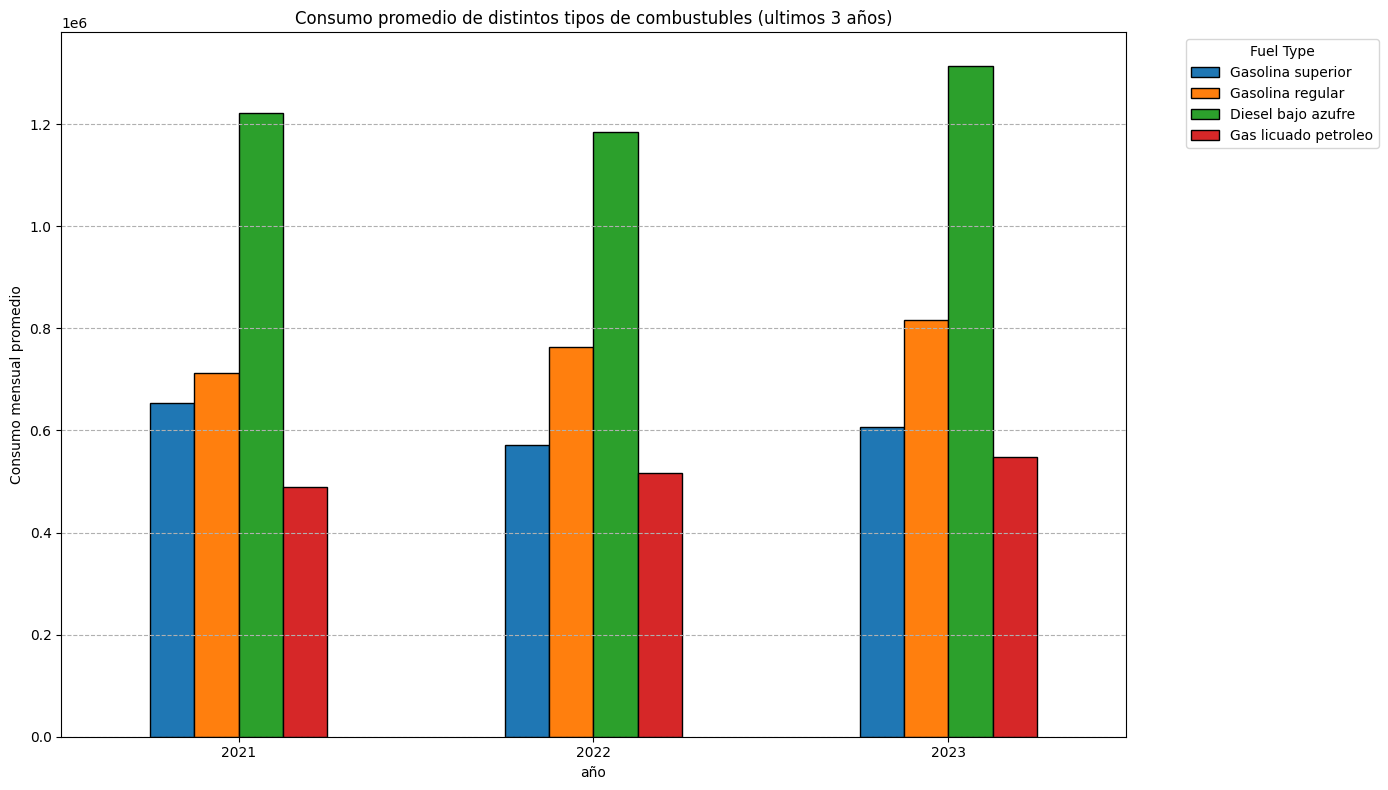

In [15]:
#consumo medio de gasolina al mes
import matplotlib.pyplot as plt

fuel_types_to_calculate = [
    "Gasolina superior",
    "Gasolina regular",
    "Diesel bajo azufre",
    "Gas licuado petroleo",
]
latest_year = df_consumption['Anio'].max()


last_three_years_data = df_consumption[df_consumption['Anio'].isin([latest_year - 2, latest_year - 1, latest_year])]

average_monthly_consumption_last_three_years = last_three_years_data.groupby('Anio')[fuel_types_to_calculate].mean()

average_monthly_consumption_last_three_years.plot(kind='bar', figsize=(14, 8), edgecolor='black')

plt.title('Consumo promedio de distintos tipos de combustubles (ultimos 3 años)')
plt.xlabel('año')
plt.ylabel('Consumo mensual promedio')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



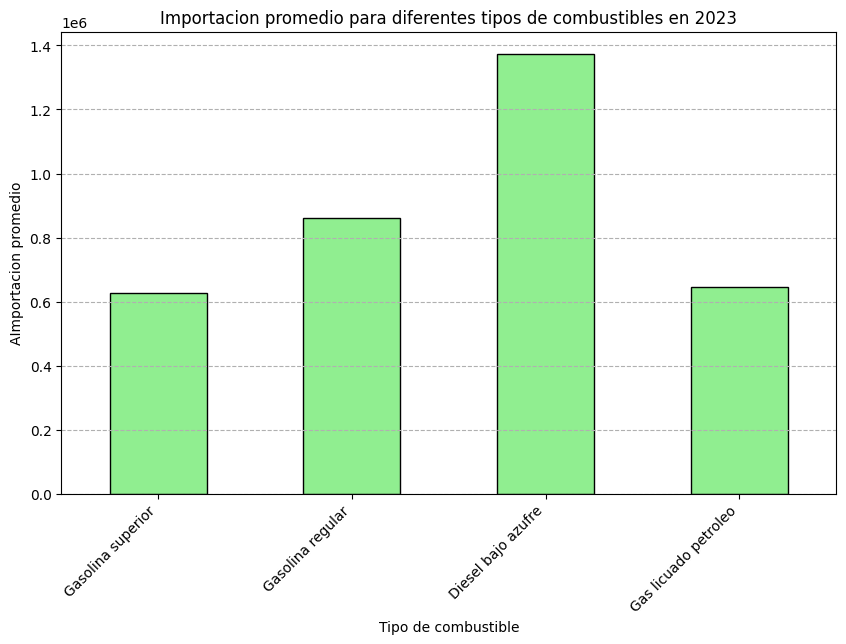

In [16]:
#Importacion promedio de combustibles
year_2023_import_data = df_import[df_import['Anio'] == 2023]

average_monthly_importation_2023 = year_2023_import_data[fuel_types_to_calculate].mean()

average_monthly_importation_2023.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')

plt.title('Importacion promedio para diferentes tipos de combustibles en 2023')
plt.xlabel('Tipo de combustible')
plt.ylabel('AImportacion promedio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


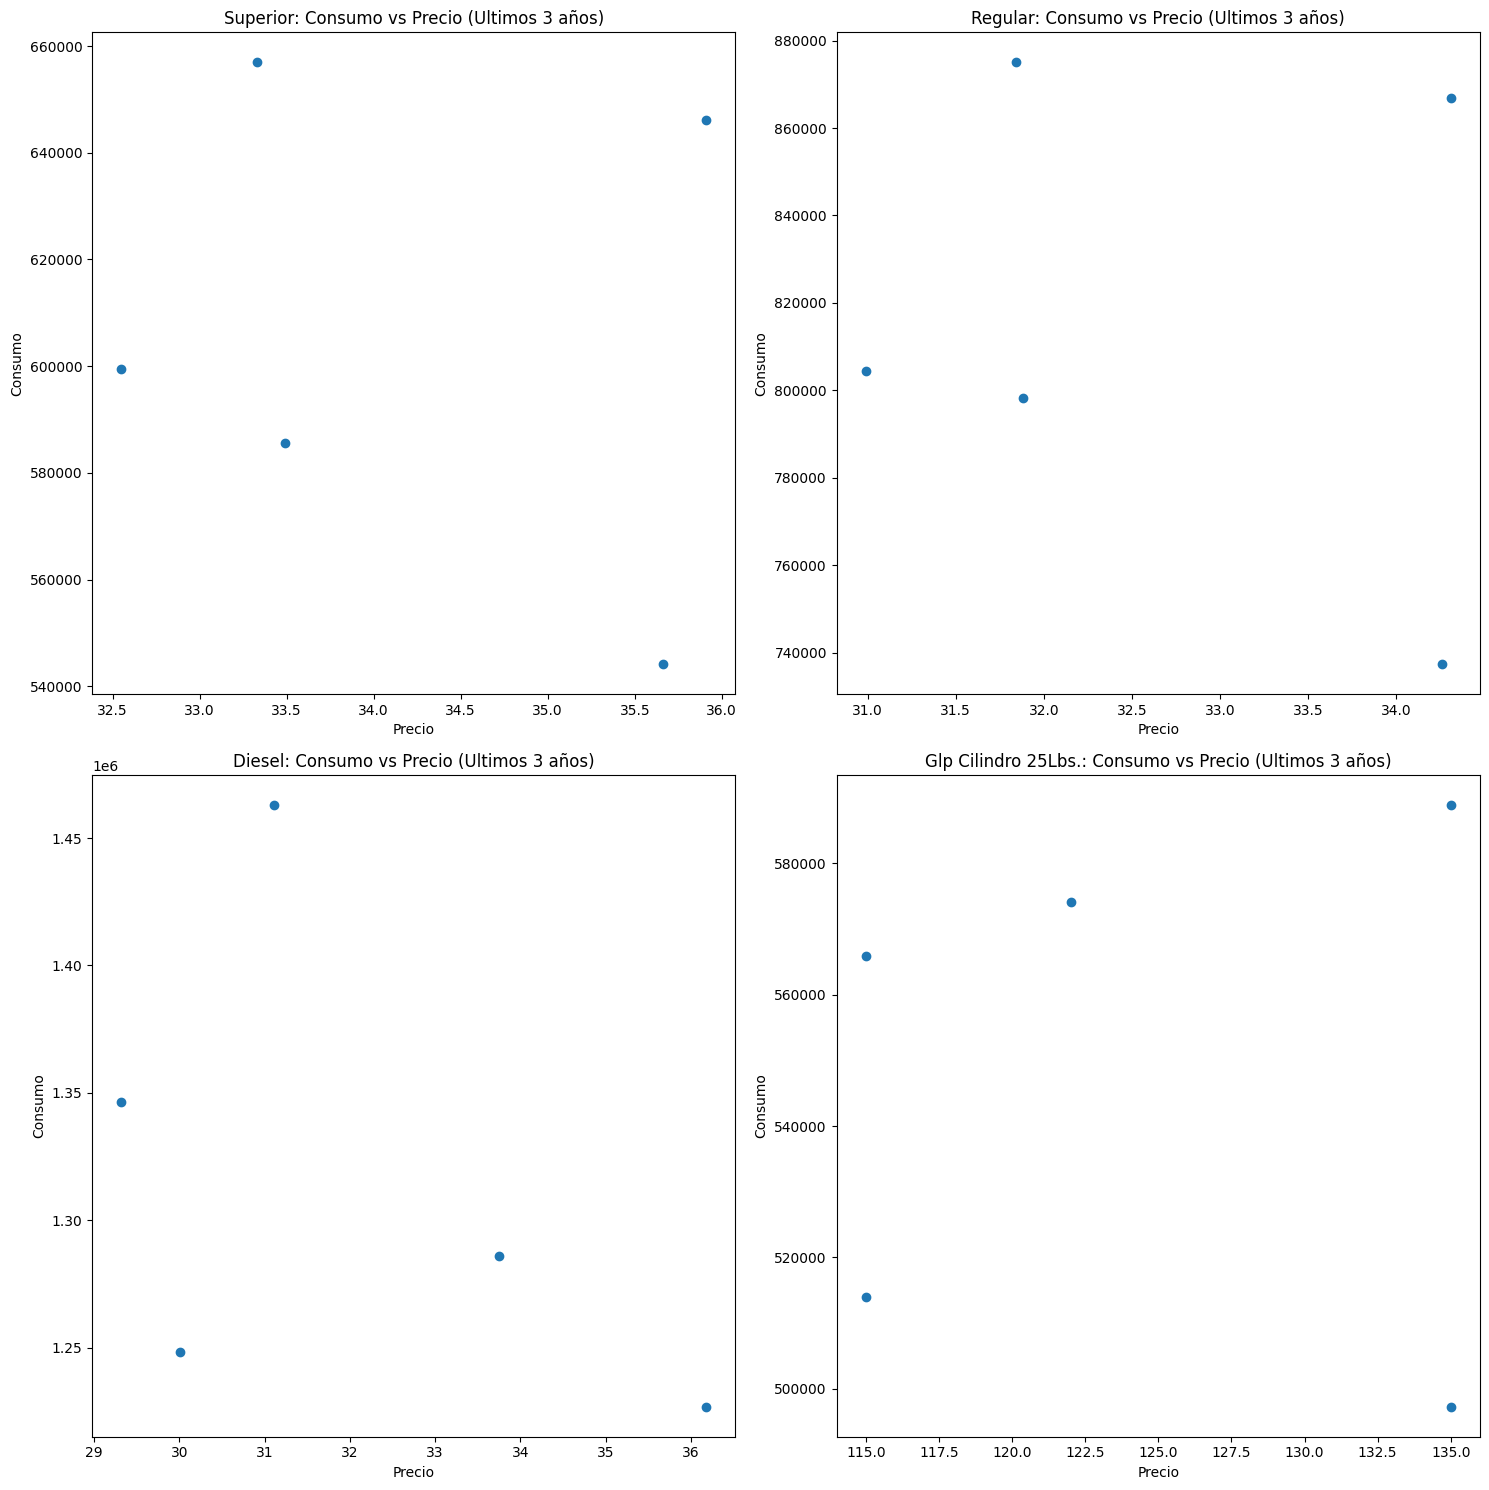

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
prices_df = pd.read_csv('data/Precios_Promedio_Nacionales.csv')

prices_df.head()

prices_df['Fecha'] = pd.to_datetime(prices_df['Fecha'])

df_consumption['Fecha'] = pd.to_datetime(df_consumption['Fecha'])

consumption_last_3_years_df = df_consumption[df_consumption['Fecha'].dt.year >= 2021]

merged_data_last_3_years = pd.merge(consumption_last_3_years_df, prices_df, on='Fecha', suffixes=('_consumption', '_price'))

fuel_types_to_calculate = {
    "Superior": "Gasolina superior",
    "Regular": "Gasolina regular",
    "Diesel": "Diesel bajo azufre",
    "Glp Cilindro 25Lbs.": "Gas licuado petroleo",
}

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for idx, (price_column, consumption_column) in enumerate(fuel_types_to_calculate.items()):
    row, col = divmod(idx, 2)
    axes[row, col].scatter(merged_data_last_3_years[price_column], merged_data_last_3_years[consumption_column])
    axes[row, col].set_title(f'{price_column}: Consumo vs Precio (Ultimos 3 años)')
    axes[row, col].set_xlabel('Precio')
    axes[row, col].set_ylabel('Consumo')

plt.tight_layout()
plt.show()



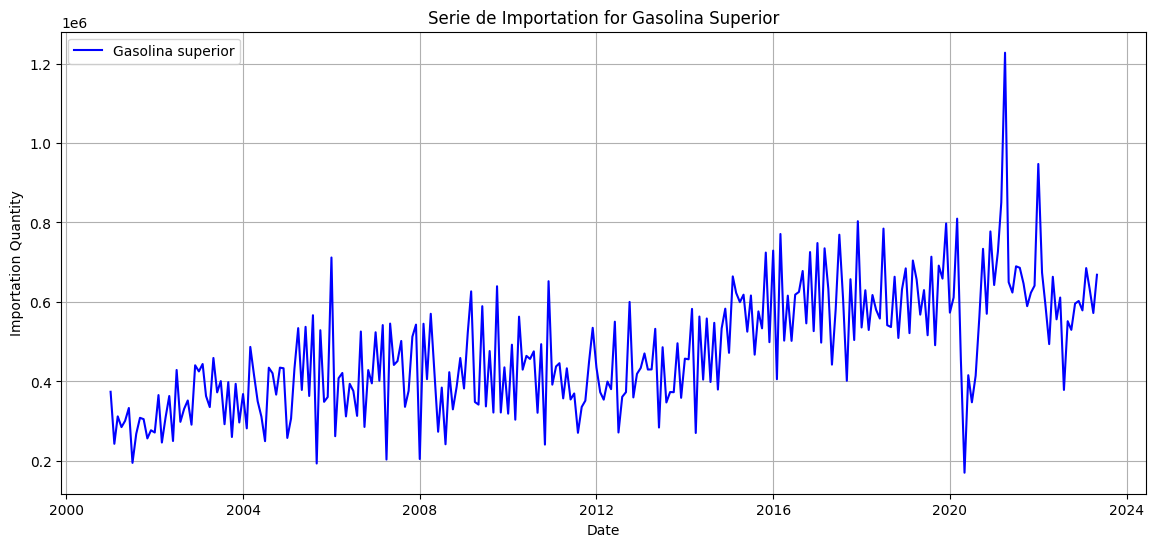

In [18]:
# inicio, fin y frequencia de la importación mensual de gasolina super, regular, diesel bajo en azufre y gas licuado de petróleo

import matplotlib.pyplot as plt
start_date_import = df_import['Fecha'].min()
end_date_import = df_import['Fecha'].max()
frequency_import = "Monthly" 

start_date_import, end_date_import, frequency_import

plt.figure(figsize=(14, 6))
plt.plot(df_import['Fecha'], df_import['Gasolina superior'], label='Gasolina superior', color='blue')
plt.title('Serie de Importation for Gasolina Superior')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()



In [48]:
#Inicio, fin y serie del precio de la gasolina superior
gasolina_superior_price_series = merged_data_last_3_years.set_index('Fecha')['Superior']

gasolina_superior_price_start = gasolina_superior_price_series.index.min()
gasolina_superior_price_end = gasolina_superior_price_series.index.max()
gasolina_superior_price_frequency = gasolina_superior_price_series.index.inferred_freq

gasolina_superior_price_start, gasolina_superior_price_end, gasolina_superior_price_frequency


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-05-01 00:00:00'), 'MS')

Inicio: January 1, 2023
Fin: May 1, 2023
Frequencia: Monthly (MS)

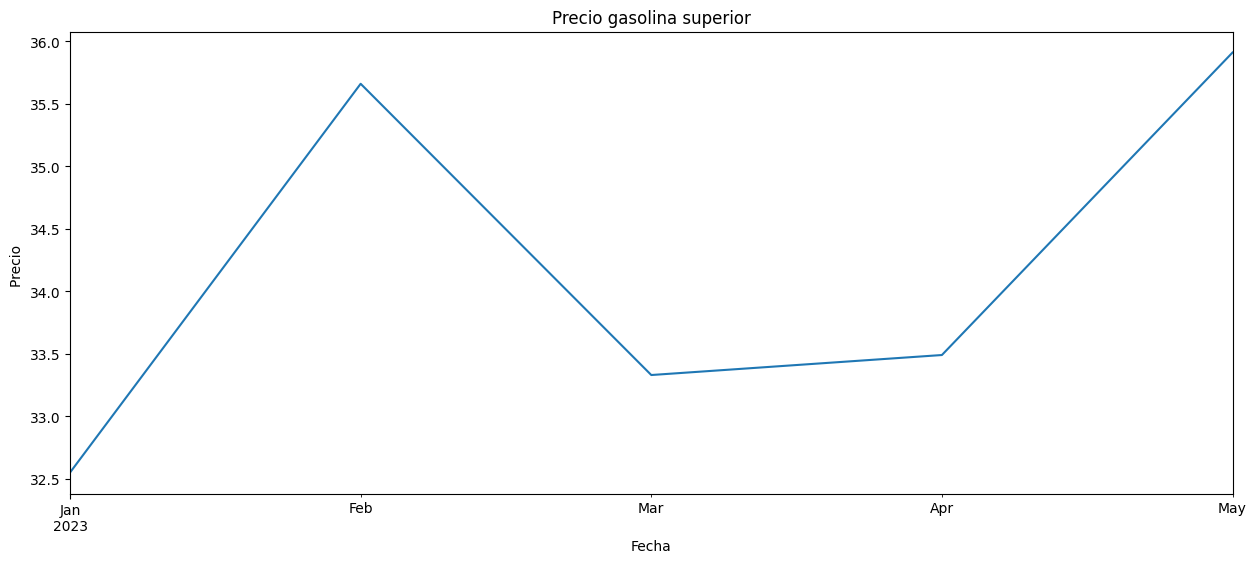

In [49]:
#serie para gasolina superior
gasolina_superior_price_series.plot(figsize=(15, 6), title='Precio gasolina superior')
plt.ylabel('Precio ')
plt.xlabel('Fecha')
plt.show()


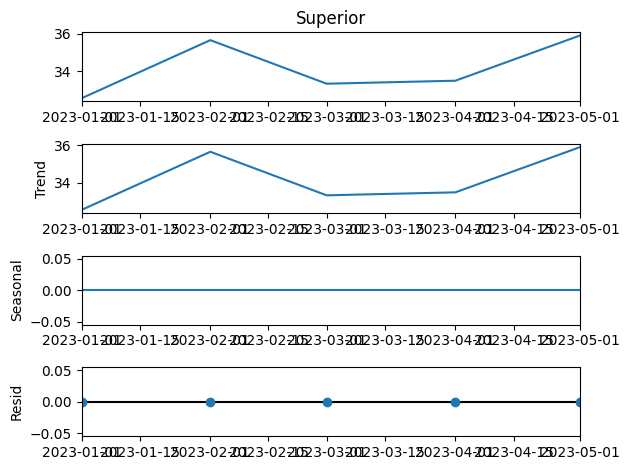

In [50]:
#decomposicion de la grafica
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
gasolina_superior_price_decomposition = seasonal_decompose(gasolina_superior_price_series, model='additive', period=1)

gasolina_superior_price_decomposition.plot()
plt.show()



Observando la grafica podemos concluir que no se necesita realizar una transformación, pero comprobaremos esto por medio de más analisis. 

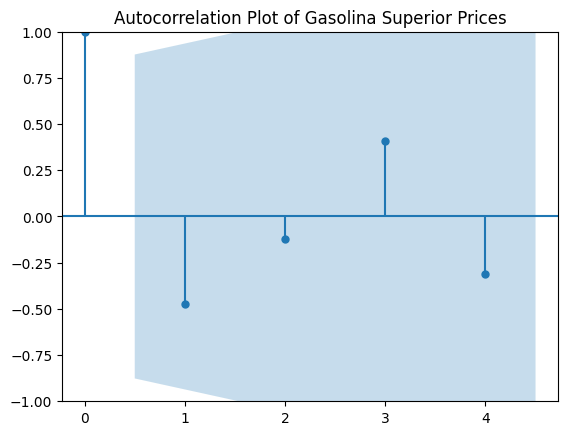

In [51]:
plot_acf(gasolina_superior_price_series, lags=4)
plt.title('Autocorrelation Plot of Gasolina Superior Prices')
plt.show()


Como podemos observar, la mayoria de los lags de la autocorrelacion son cercanos a 0, por lo que podemos decir que la grafica tiene una estacionaridad en media

ii. Valores estadísticos como la prueba de Dickey-Fuller. Aumentada para corroborar la no estacionarieda en media. 

¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

In [ ]:
#Dickey-Fuller Aumentado
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(gasolina_superior_price_series)

adf_statistic = adf_result[0]
adf_p_value = adf_result[1]

adf_statistic, adf_p_value
adf_critical_values = adf_result[4]

adf_critical_values_1_5_10 = {
    "1%": adf_critical_values["1%"],
    "5%": adf_critical_values["5%"],
    "10%": adf_critical_values["10%"],
}
print(adf_statistic," ", adf_p_value)



-3.0057241125003036   0.03436328702123322


Como podemos observar, los resultados de Dickey Fuller Aumentado son los siguientes: 

Test Statistic: -3.0057
P-values: 0.0344

Esto nos indica que la serie tiene estacionaridad media,  y no hay necesidad de realizar una transformación para la misma

#### f.  Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA que utilizará para predecir. Explique en qué se basó para darle valor a estos parámetros, basándose en las funciones de autocorrelación y autocorrelación parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el modelo propuesto.

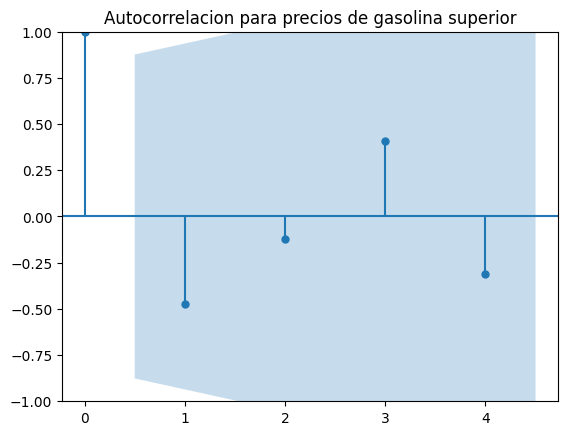

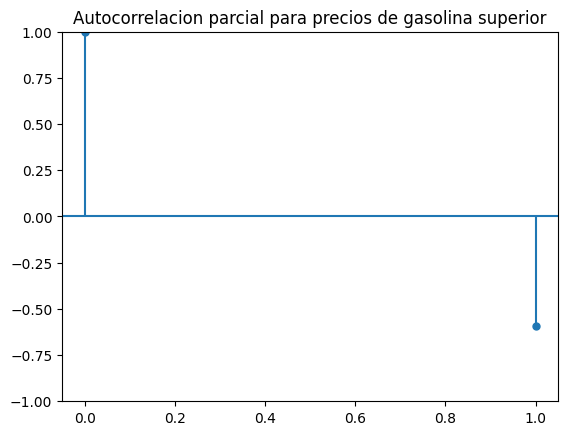

In [ ]:
#Ploteo de autocorrelacion y autocorrelacion parcial
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(gasolina_superior_price_series, lags=4)
plt.title('Autocorrelacion para precios de gasolina superior')
plt.show()

plot_pacf(gasolina_superior_price_series, lags=1)
plt.title('Autocorrelacion parcial para precios de gasolina superior')
plt.show()

Autocorrelacion: No se observan lags significativos, lo cual indica que la serie no necesita un MA. 
Autocorrelacion parcial: Se muestra un lag siginificativo, lo cual nos indica que la serie puede tener un potencia AR

Dado esto se decidio tabajar con los siguientes modelos ARIMA:

ARIMA(1, 0, 0): Un modelo AR de orden 1 (p=1, d=0, q=0)
ARIMA(0, 1, 0): Un modelo diferenciado de orden 1 (p=0, d=1, q=0)
ARIMA(0, 0, 0): Un modelo simple de media (p=0, d=0, q=0)

#### g.  Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

models_to_fit = [
    (1, 0, 0), # ARIMA(1, 0, 0)
    (0, 1, 0), # ARIMA(0, 1, 0)
    (0, 0, 0)  # ARIMA(0, 0, 0)
]

def fit_and_compare_arima_models(series, orders):
    results = []
    for order in orders:
        try:
            model = ARIMA(series, order=order)
            result = model.fit()
            aic = result.aic
            bic = result.bic
            results.append((order, aic, bic))
        except:
            continue 
    return pd.DataFrame(results, columns=['Order (p, d, q)', 'AIC', 'BIC'])

arima_comparison_results = fit_and_compare_arima_models(gasolina_superior_price_series, models_to_fit)
arima_comparison_results.sort_values(by=['AIC', 'BIC'])


C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\l

,"Order (p, d, q)",AIC,BIC
1,"(0, 1, 0)",19.981181,19.367476
0,"(1, 0, 0)",20.517298,19.345611
2,"(0, 0, 0)",21.149651,20.368527


Como podemos observar, el modelo ARIMA(0,1,0) tiene los valores AIC y BIC mas pequeños, lo cual nos indica que es el modelo ideal de los modelos que se escogieron

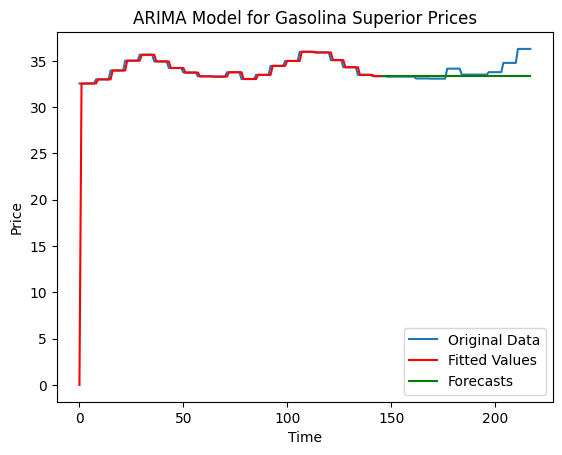

In [40]:
from statsmodels.tsa.arima.model import ARIMA

gasolina_superior_price_series = prices_df['Superior']

train_size_price = int(len(gasolina_superior_price_series) * 0.67)
train_data_arima_price = gasolina_superior_price_series[:train_size_price].values

arima_model_price = ARIMA(train_data_arima_price, order=(0, 1, 0))
arima_fit_price = arima_model_price.fit()

plt.plot(gasolina_superior_price_series, label='Original Data')

# Plot the fitted values (in-sample predictions)
fitted_values_price = arima_fit_price.fittedvalues
plt.plot(fitted_values_price, color='red', label='Fitted Values')

# Plot the forecasts (out-of-sample predictions)
forecast_steps_price = len(gasolina_superior_price_series) - train_size_price
forecasts_price = arima_fit_price.forecast(steps=forecast_steps_price)
plt.plot(range(len(fitted_values_price), len(fitted_values_price) + forecast_steps_price), forecasts_price, color='green', label='Forecasts')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ARIMA Model for Gasolina Superior Prices')
plt.show()


#### h.  Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 5.3765e-06
Epoch 2/200
3/3 [==============================] - 0s 1ms/step - loss: 2.8275e-06
Epoch 3/200
3/3 [==============================] - 0s 1ms/step - loss: 2.2383e-06
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 1.7804e-06
Epoch 5/200
3/3 [==============================] - 0s 1ms/step - loss: 2.4786e-06
Epoch 6/200
3/3 [==============================] - 0s 1ms/step - loss: 2.2302e-06
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 1.8462e-06
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 1.4944e-06
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 1.5988e-06
Epoch 10/200
3/3 [==============================] - 0s 1ms/step - loss: 1.8292e-06
Epoch 11/200
3/3 [==============================] - 0s 1ms/step - loss: 1.8601e-06
Epoch 12/200
3/3 [==============================] - 0s 1ms/step - loss: 1.6567e-06
Epoch 13/200


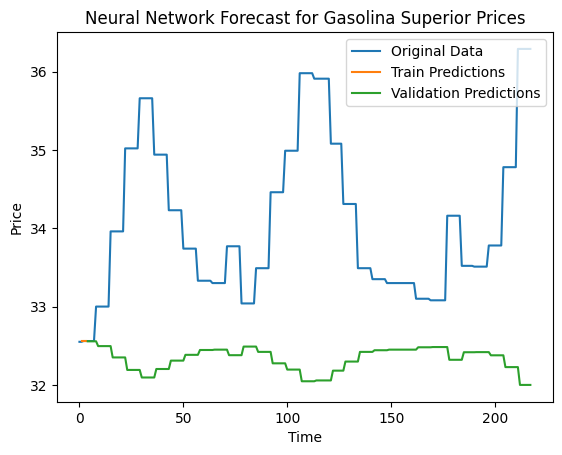

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

gasolina_superior_price_series = prices_df['Superior']

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(gasolina_superior_price_series.values.reshape(-1, 1))

look_back = 1
X, Y = create_dataset(scaled_series, look_back)

train_size = 3
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=200, batch_size=1, verbose=1)

train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
val_predict = scaler.inverse_transform(val_predict)
Y_val = scaler.inverse_transform([Y_val])

plt.plot(gasolina_superior_price_series.values, label='Original Data')
plt.plot(range(look_back, look_back + train_size), train_predict, label='Train Predictions')
plt.plot(range(look_back + train_size, len(gasolina_superior_price_series)), val_predict, label='Validation Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Neural Network Forecast for Gasolina Superior Prices')
plt.show()


## 4. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción. En el caso de la serie de precios, use los datos de 2023 como conjunto de prueba

Como podemos observar, ya que el dataset de los precios es demasiado pequeño, ni el modelo ARIMA ni la Red Neuronal dan resultados realistas, por lo que vamos a realizar el analisis para el consumo de la gasolina superior para tener un analisis mas completo y acertado. 

## 3. a. Especifique Inicio, fin, y frecuencia. b. Haga un gráfico de la serie y explique qué información puede obtener a primeravista. c. Descomponga la serie. Teniendo en cuenta el diagrama de la serie y suscomponentes discuta si es posible hablar de estacionariedad en media y en varianza

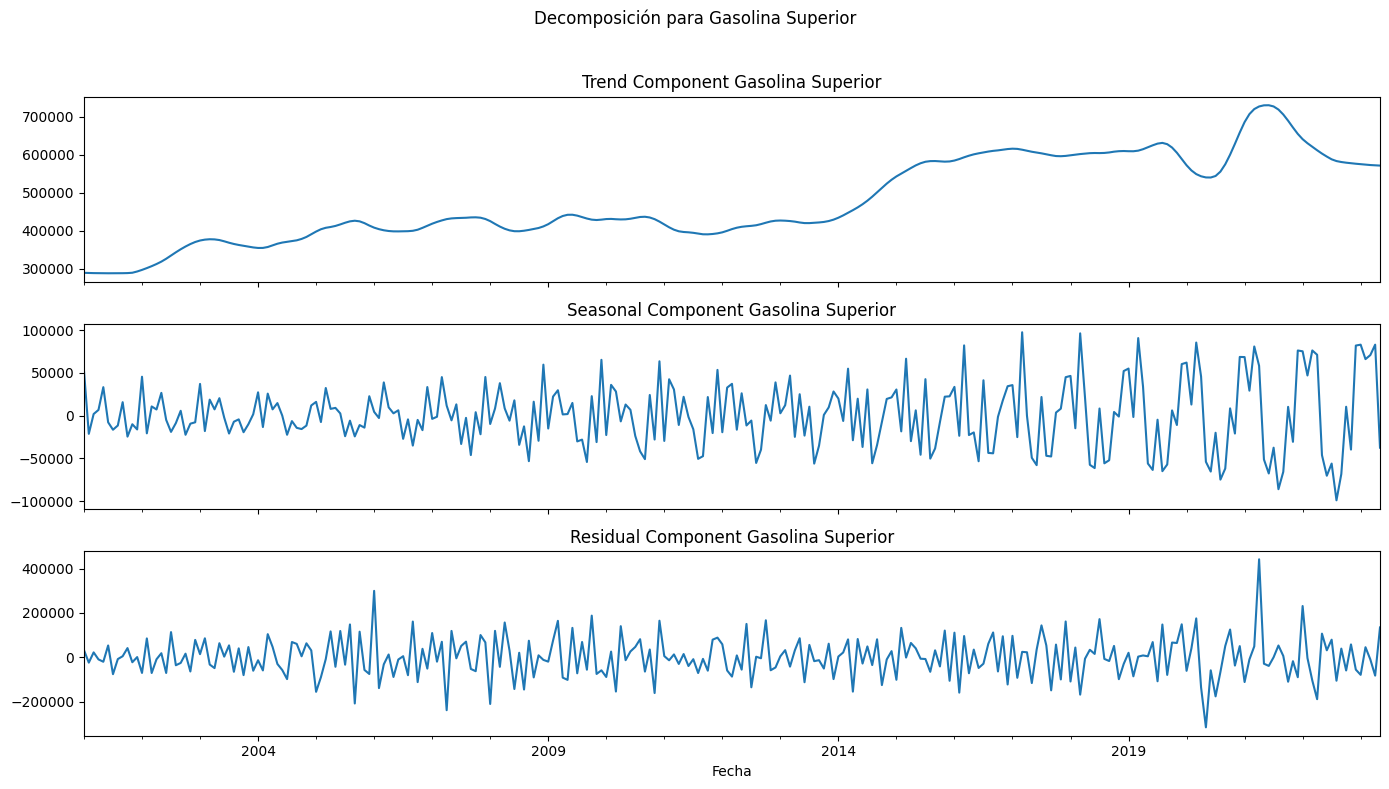

In [32]:
#descomposicion de las series

from statsmodels.tsa.seasonal import STL
gasolina_superior_series = df_import.set_index('Fecha')['Gasolina superior']

stl_gasolina_superior = STL(gasolina_superior_series, seasonal=13) 
result_gasolina_superior = stl_gasolina_superior.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gasolina_superior.trend.plot(ax=ax1, title='Trend Component Gasolina Superior')
result_gasolina_superior.seasonal.plot(ax=ax2, title='Seasonal Component Gasolina Superior')
result_gasolina_superior.resid.plot(ax=ax3, title='Residual Component Gasolina Superior')
plt.suptitle('Decomposición para Gasolina Superior')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## Determine si es necesario transformar la serie. Explique.

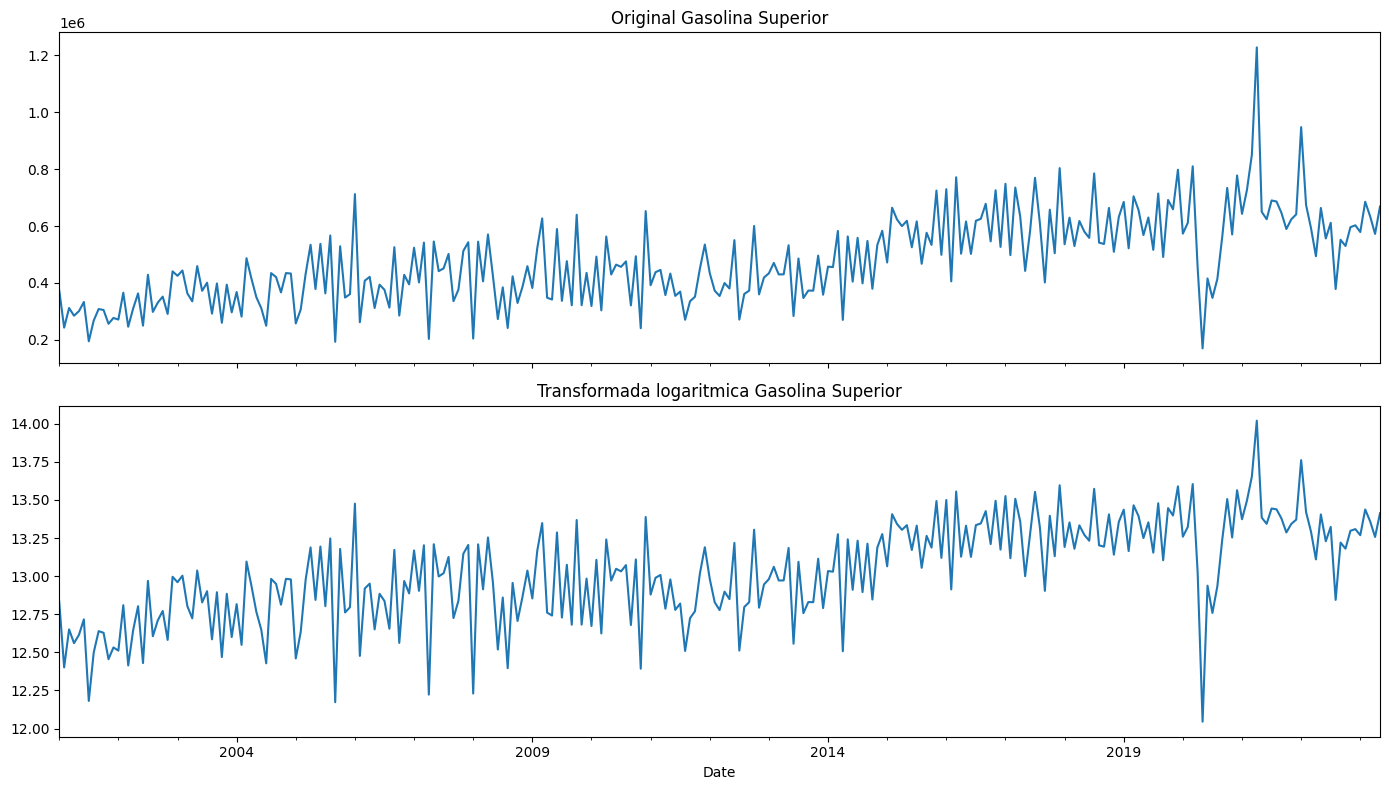

In [33]:

import numpy as np

log_gasolina_superior_series = np.log(gasolina_superior_series)

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 8), sharex=True)
gasolina_superior_series.plot(ax=ax1, title='Original Gasolina Superior')
log_gasolina_superior_series.plot(ax=ax2, title='Transformada logaritmica Gasolina Superior')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


Como podemos observar, no se merece una transformación, ya que ambas series son bastante similares y no muestran comportamientos que varian entre ellas. Por motivos de estabilidad se puede trabajar con la transformada logaritmicamente, pero no es necesario ni obligatorio realizar ninguna transformación. 

## E. i. Haga el gráfico de autocorrelación y úselo para explicar la no estacionariedad en media

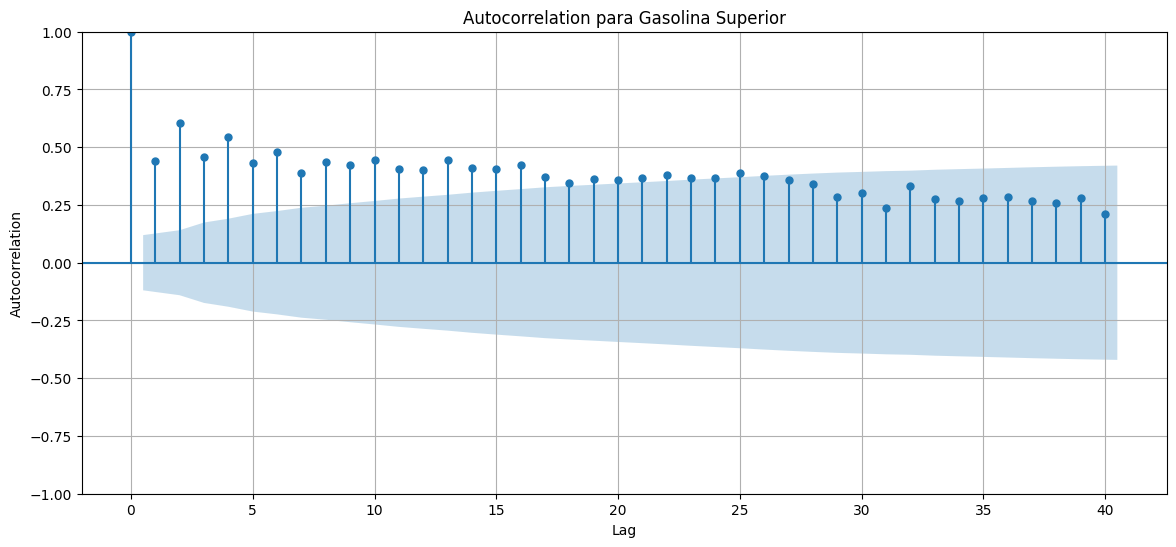

In [34]:
#E. i. grafica de autocorrelación 
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(14, 6))
plot_acf(gasolina_superior_series, ax=ax, lags=40)
plt.title('Autocorrelation para Gasolina Superior')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


## ii. Valores estadísticos como la prueba de Dickey-Fuller. Aumentada para corroborar la no estacionarieda en media.  ¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

In [35]:
# E. ii. Prueba Dickey-Fuller Aumentada (ADF)
from statsmodels.tsa.stattools import adfuller

# Performing the Dickey-Fuller Augmented test on the time series for "Gasolina superior"
adf_result_gasolina_superior = adfuller(gasolina_superior_series)

# Extracting the test statistic, p-value, and critical values
adf_statistic = adf_result_gasolina_superior[0]
p_value = adf_result_gasolina_superior[1]
critical_values = adf_result_gasolina_superior[4]

adf_statistic, p_value, critical_values


(-3.0284347009544144,
 0.03232293895189888,
 {'1%': -3.4552699038400827,
  '5%': -2.8725092359464526,
  '10%': -2.5726152830188678})

Como podemos observar, los valores de la prueba de Dickey-Fuller Aumentada son los siguientes: 
Test Statistic: -3.03
P-value: 0.0323
Valores Criticos:
1%: -3.46
5%: -2.87
10%: -2.57

Tomando esto y la grafica de autocorrelación, y sabiendo que nuestro valores criticos son menores al valor estadistico evalulado, podemos decir con bastante confianza que la serie con la que se esta trabajando no posee estacionaridad en media. En este caso nos cmbiene transfformala logaritmicamente para que se mantenga con estacionaridad en media. 

## f. Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA que utilizará para predecir. Explique en qué se basó para darle valor a estos parámetros, basándose en las funciones de autocorrelación y autocorrelación parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el modelo propuesto.

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


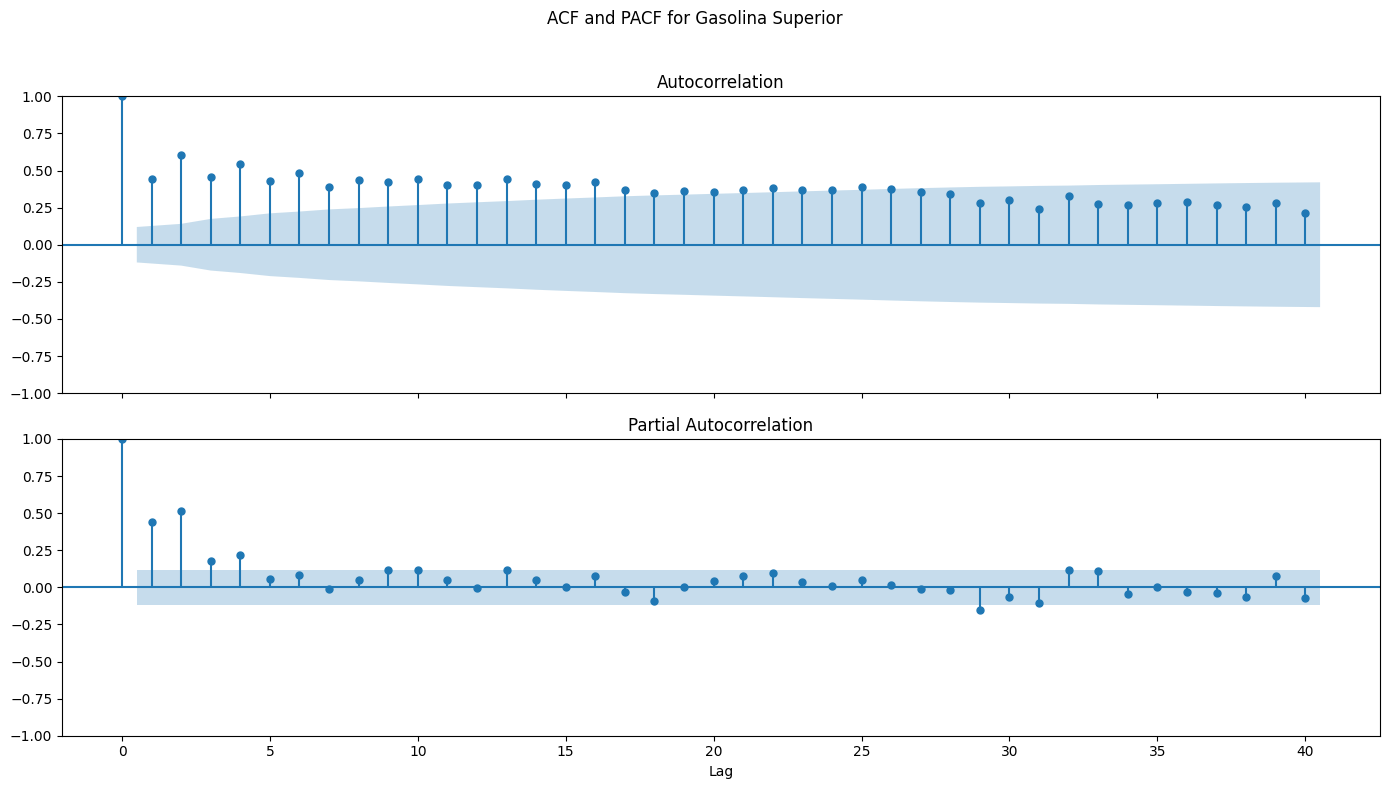

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 8), sharex=True)
plot_acf(gasolina_superior_series, ax=ax1, lags=40)
plot_pacf(gasolina_superior_series, ax=ax2, lags=40)
plt.xlabel('Lag')
plt.suptitle('ACF and PACF for Gasolina Superior')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [37]:
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_model(series, order):
    model = ARIMA(series, order=order)
    result = model.fit()
    return result

arima_111_model = fit_arima_model(gasolina_superior_series, order=(1,1,1))

arima_111_model.summary()


C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Gasolina superior   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3498.161
Date:                Wed, 09 Aug 2023   AIC                           7002.323
Time:                        23:25:29   BIC                           7013.096
Sample:                    01-01-2001   HQIC                          7006.650
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2205      0.065     -3.392      0.001      -0.348      -0.093
ma.L1         -0.7818      0.035    -22.103      0.000      -0.851      -0.712
sigma2      1.353e+10   1.99e-12   6.79e+21      0.000    1.35e+10    1.35e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               137.01
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+37. Standard errors may be unstable.
"""

Los resultados con esta arima son los siguientes: 
AR Order (p): 1
Differencing Order (d): 1
MA Order (q): 1
AIC: 7002.323
BIC: 7013.096

## g.  Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

In [38]:
arima_orders = [
    (0,1,1),
    (1,1,0),
    (2,1,1),
    (2,1,0),
    (1,1,2),
    (2,1,2)
]

arima_summaries = {
    "Order": [],
    "AIC": [],
    "BIC": []
}

arima_summaries["Order"].append((1,1,1))
arima_summaries["AIC"].append(arima_111_model.aic)
arima_summaries["BIC"].append(arima_111_model.bic)

for order in arima_orders:
    model_result = fit_arima_model(gasolina_superior_series, order)
    arima_summaries["Order"].append(order)
    arima_summaries["AIC"].append(model_result.aic)
    arima_summaries["BIC"].append(model_result.bic)

arima_summaries_df = pd.DataFrame(arima_summaries)

arima_summaries_df.sort_values(by="AIC", ascending=True)


C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\l

,Order,AIC,BIC
3,"(2, 1, 1)",6994.622921,7008.986869
5,"(1, 1, 2)",6996.030543,7010.394491
6,"(2, 1, 2)",6996.363863,7014.318798
0,"(1, 1, 1)",7002.322954,7013.095915
1,"(0, 1, 1)",7010.215774,7017.397748
4,"(2, 1, 0)",7028.888073,7039.661034
2,"(1, 1, 0)",7044.251492,7051.433466


Como podemos observar, el modelo ARIMA(2,1,1) es el que tiene menor AIC y BIC, y es el mas adaptado para nuestro caso

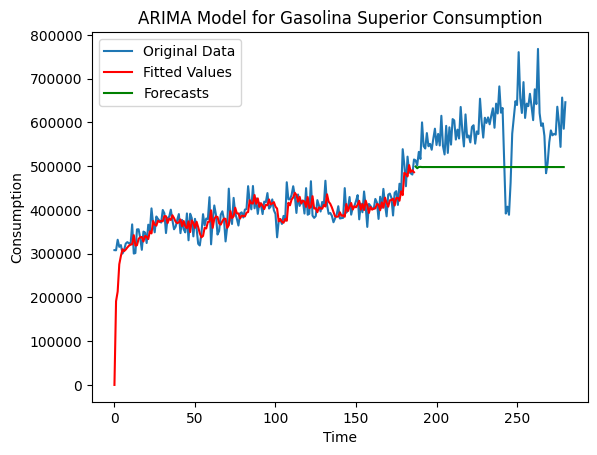

In [39]:
from statsmodels.tsa.arima.model import ARIMA

gasolina_superior_consumption_series = df_consumption['Gasolina superior']
train_data_arima = gasolina_superior_consumption_series[:train_size].values

arima_model = ARIMA(train_data_arima, order=(2, 1, 1))
arima_fit = arima_model.fit()

plt.plot(gasolina_superior_consumption_series, label='Original Data')

fitted_values = arima_fit.fittedvalues
plt.plot(fitted_values, color='red', label='Fitted Values')

forecast_steps = len(Y_val[0])
forecasts = arima_fit.forecast(steps=forecast_steps)
plt.plot(range(len(fitted_values), len(fitted_values) + forecast_steps), forecasts, color='green', label='Forecasts')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('ARIMA Model for Gasolina Superior Consumption')
plt.show()


#### h.  Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

Epoch 1/200
187/187 [==============================] - 0s 539us/step - loss: 0.0075
Epoch 2/200
187/187 [==============================] - 0s 526us/step - loss: 0.0052
Epoch 3/200
187/187 [==============================] - 0s 520us/step - loss: 0.0049
Epoch 4/200
187/187 [==============================] - 0s 517us/step - loss: 0.0048
Epoch 5/200
187/187 [==============================] - 0s 517us/step - loss: 0.0048
Epoch 6/200
187/187 [==============================] - 0s 518us/step - loss: 0.0048
Epoch 7/200
187/187 [==============================] - 0s 510us/step - loss: 0.0049
Epoch 8/200
187/187 [==============================] - 0s 512us/step - loss: 0.0048
Epoch 9/200
187/187 [==============================] - 0s 515us/step - loss: 0.0048
Epoch 10/200
187/187 [==============================] - 0s 547us/step - loss: 0.0048
Epoch 11/200
187/187 [==============================] - 0s 533us/step - loss: 0.0048
Epoch 12/200
187/187 [==============================] - 0s 526us/step - lo

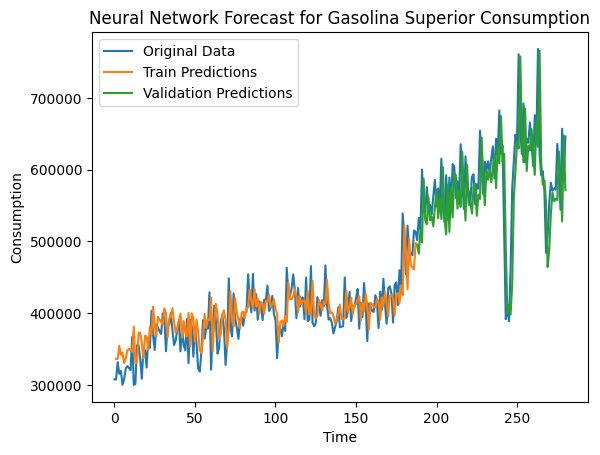

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

gasolina_superior_consumption_series = df_consumption['Gasolina superior']

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(gasolina_superior_consumption_series.values.reshape(-1, 1))

look_back = 1
X, Y = create_dataset(scaled_series, look_back)

train_size = int(len(X) * 0.67)
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=200, batch_size=1, verbose=1)

train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
val_predict = scaler.inverse_transform(val_predict)
Y_val = scaler.inverse_transform([Y_val])

plt.plot(gasolina_superior_consumption_series.values, label='Original Data')
plt.plot(range(look_back, look_back + train_size), train_predict, label='Train Predictions')
plt.plot(range(look_back + train_size, len(gasolina_superior_consumption_series)), val_predict, label='Validation Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Neural Network Forecast for Gasolina Superior Consumption')
plt.show()



Como podemos observar, el modelo ARIMA no tiene una predicción buena comparada con la data quie se puede observar en este año, comparado con la red neuronal que si tiene una predcicion acerdatada del aumento que se observa en el consumo de la gasolina superior con respecto a la data que se encuentra de este año.

### 5. Haga una predicción para todo este año 2023 determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

### 6. Discuta cuál fue el comportamiento de las series durante la pandemia. ¿Qué tanto afectó las predicciones?¿se recuperaron los valores habituales en el regreso a la “nueva normalidad”?